# (予習)Sprint6 機械学習スクラッチ決定木

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

### ＜シンプルデータセット2＞

In [2]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y = y.reshape(-1,1)

ds_simple2={}

ds_simple2["X"] = X
ds_simple2["y"] = y

# データ分割
X_train, X_test, y_train, y_test = train_test_split(ds_simple2["X"], ds_simple2["y"], train_size=0.8, random_state=0)

In [3]:
X_train

array([[-2.1086  ,  8.3428  ],
       [ 0.5461  ,  5.8245  ],
       [-2.9452  , -1.8219  ],
       [-2.353   , -0.72261 ],
       [-0.12243 ,  9.0162  ],
       [ 0.10645 ,  1.9242  ],
       [ 0.057313,  5.4681  ],
       [-0.65259 ,  9.3444  ],
       [-6.6797  ,  0.67661 ],
       [ 0.58619 ,  0.37158 ],
       [ 1.1319  ,  2.4023  ],
       [-0.61251 , -0.75345 ],
       [-2.9362  ,  2.5462  ],
       [-3.1625  , -3.9606  ],
       [ 0.6017  ,  4.3439  ],
       [-0.57242 , -2.9915  ],
       [-3.0603  , -3.6461  ],
       [-0.60216 ,  8.4636  ],
       [ 0.50214 , -0.31818 ],
       [-1.4621  , -2.4586  ],
       [-2.234   , -2.5323  ],
       [-3.1108  ,  0.15394 ],
       [ 0.59912 ,  5.3524  ],
       [ 0.96765 , 10.083   ],
       [ 0.56421 ,  0.72888 ],
       [-1.281   , 15.6824  ],
       [ 0.35084 , -0.031994],
       [-4.1013  , -4.353   ],
       [-0.73535 , -2.2718  ],
       [-2.5677  , 13.1779  ],
       [-3.5944  , -4.0112  ],
       [-0.44699 , -2.8073  ]])

## 【問題1】ジニ不純度を求める関数

ノード の ジニ不純度 を計算する関数を作成してください。ノード $t$に対するジニ不純度 $I(t)$
 は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。

$$
I(t) = 1-\sum_{i=1}^{K}P^2(C_i|t) = 1-\sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^{2}
$$

$t$ : ノードのインデックス

$i$ : クラスのインデックス

$K$ : クラスの数

$C_i$ : $i$番目のクラス

$P(C_i|t)$ :　$t$番目のノードにおける$C_i$の割合

$N_{t,i}$ : $t$番目のノードのi番目のクラスに属するサンプル数

$N_{t,all}$ : $t$番目のノードのサンプルの総数

まずは簡単な例を作り、手計算と関数の結果を比較してください。

<<例>>

クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500  
クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667  
クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480  
クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000  


### <<手計算>>

In [4]:
# クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500
1 - ( (15/30)**2 + (15/30)**2 ) 

0.5

In [5]:
# クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667
1 - ( (15/45)**2 + (15/45)**2 + (15/45)**2 ) 

0.6666666666666667

In [6]:
# クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480
1 - ( (18/30)**2 + (12/30)**2 ) 

0.48

In [7]:
# クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000
1 - ( (30/30)**2 + (0/30)**2 ) 

0.0

    gini = 1 - ( (n1 / np.sum(n))**2 + (n2 / np.sum(n))**2 + ・・・
         = 1 - ( (n1**2 + n2**2 + ・・・)/np.sum(n)**2)

$$
    gini = 1- \biggl( \biggl(\frac{n_1}{n_{all}}\biggr)^{2} + \biggl(\frac{n_2}{n_{all}}\biggr)^{2} ・・・ \biggr)
$$

### <<メソッド化>>

In [8]:
import numpy as np
def gini(n):
    '''
    Parameters
    ----------
    n : 次の形のndarray, shape (n_samples, )
        各クラスのサンプル数（class1, class2, ・・・）
    '''

    gini = 1 - np.sum((n / np.sum(n))**2)
    
    return gini

In [9]:
n_1 = [15, 15]
gini(n_1)

0.5

In [10]:
n_2 = [15, 15, 15]
gini(n_2)

0.6666666666666667

In [11]:
n_3 = [18, 12]
gini(n_3)

0.48

In [12]:
n_3 = [30, 0]
gini(n_3)

0.0

### <<クラスの該当部分>>

```python
    def gini(n):
        '''
        Parameters
        ----------
        n : 次の形のndarray, shape (n_samples, )
            各クラスのサンプル数（class1, class2, ・・・）
        '''

        gini = 1 - np.sum((n / np.sum(n))**2)

        return gini

```

## 【問題2】情報利得を求める関数

次に、情報利得を計算する関数を作成してください。先ほど作成したジニ不純度$I(t)$を計算する関数を呼び出して使います。情報利得$IG$は以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。

ここで分岐は2つのみであるため、分岐先を「左側のノード・右側のノード」と呼びます。

$$
    IG(p) = I(p)-\frac{N_{left,all}}{N_{p,all}}I(left)-\frac{N_{right,all}}{N_{p,all}}I(right)
$$
$p$ : 親ノードを示すインデックス

$left$ : 左側のノードを示すインデックス

$right$ : 右側のノードを示すインデックス

まずは簡単な例を作り、手計算と関数の結果を比較してください。

<<例>>

左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30,   
右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5  
→ 情報利得0.143




### <<手計算>>

親ノードのジニ不純度I(p)は、  
クラス１：サンプル数10 + 20 = 30  
クラス２：サンプル数30 + 5  = 35
から  
$$
I(p) = 1-\biggl( \biggl(\frac{30}{30 + 35}\biggr)^2 + \biggl(\frac{35}{30 + 35}\biggr)^2 \biggr)
$$

In [13]:
left_c1 = 10
left_c2 = 30
right_c1 = 20
right_c2 = 5
all_c = left_c1 + left_c2 +right_c1 + right_c2

In [14]:
ip = 1-( ((left_c1 + right_c1)/(all_c)) **2 + ((left_c2 + right_c2)/(all_c))**2 )
ip

0.4970414201183432

左ノードのジニ不純度I(left)は
クラス１サンプル数：10  
クラス２サンプル数：30  
から
$$
I(left) = 1-\biggl( \biggl(\frac{10}{10 + 30}\biggr)^2 + \biggl(\frac{30}{10 + 30}\biggr)^2 \biggr)
$$

In [15]:
left = 1-( (left_c1/(left_c1 + left_c2)) **2 + (left_c2/(left_c1 + left_c2))**2 )
left

0.375

右ノードのジニ不純度I(right)は  
クラス１サンプル数：20  
クラス２サンプル数： 5  
から
$$
I(right) = 1-\biggl(\frac{20}{20 + 5})^2 + (\frac{5}{20 + 5})^2 \biggr)
$$

In [16]:
right = 1-( (right_c1/(right_c1 + right_c2)) **2 + (right_c2/(right_c1 + right_c2))**2 )
right

0.31999999999999984

$$
IG(p) = 0.497 - \biggl( \biggl(\frac{10 + 30}{30 + 35}\biggr) * 0.375 + \biggl(\frac{20 + 5}{30 + 35}\biggr) * 0.320 \biggr)
$$

In [17]:
ip - ( (left_c1 + left_c2)/(all_c) *left + (right_c1 + right_c2)/(all_c) * right)

0.14319526627218937

### <<メソッド化>>

In [18]:
def _information_gain(p_data, left_data, right_data):
    I_left = ( np.sum(left_data)/( np.sum(left_data + right_data)) ) * gini(left_data)
    I_right = ( np.sum(right_data)/( np.sum(left_data + right_data)) ) * gini(right_data)

    IG = gini(p_data) -(I_left + I_right)
    
    return IG

In [19]:
y_p = np.array([30, 35])
left_sample = np.array([10, 30])
right_sample = np.array([20, 5])
IGp = _information_gain(y_p, left_sample, right_sample)
IGp

0.14319526627218937

### <<クラスの該当部分>>

```python
    def _information_gain(self, p_data, left_data, right_data):
        I_left = ( np.sum(left_data)/( np.sum(left_data + right_data)) ) * gini(left_data)
        I_right = ( np.sum(right_data)/( np.sum(left_data + right_data)) ) * gini(right_data)

        IG = gini(p_data) -(I_left + I_right)

        return IG
```

## 【問題3】学習

空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。


訓練データに対して全ての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。


クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。


《組み合わせの取り方》

全ての組み合わせの取り方は、最も単純には各特徴量の値自体をしきい値にして分割を行う方法があります。片側の端は今回のスクラッチはこの方法で行なってください。


他には中間の値をしきい値にする方法もあり、scikit-learnではこの方法が用いられています。


《補足》


問題2の情報利得を計算する関数はこの問題3で利用する上では、親ノードの不純度 
I
(
p
)
 は固定されるため、左右のノードの不純度の合計を計算するだけでも同じ結果が得られることになります。しかし、ここでは親ノードを考慮した情報利得を計算する実装を行なってください。

### <<メソッド化>>

In [20]:
def fit(X, y):
    Xy = np.concatenate([X, y], axis = 1)
    Xy_left = []
    Xy_right = []
    left_list = []
    right_list = []

    IGp = np.zeros(X.shape[0] * X.shape[1]).reshape(X.shape[0], X.shape[1])
    dic_IGp ={
        "k":0,
        "i":0,
        "threshold":0,
        "IGp":0,
    }
    
    # 特徴量の値をループさせ、閾値を設定する
    # k:特徴量Index
    # i:閾値Index
    # j:比較Index
    for k in range(X.shape[1]):
        for i in range(Xy.shape[0]):
            left_list = []
            right_list = []
            for j in range(Xy.shape[0]):
                if Xy[j,k] < Xy[i,k]:
                    left_list.append(Xy[j])
                else:
                    right_list.append(Xy[j])

            
            if len(left_list) == 0 or len(right_list) == 0:
                print("★★★　k={}, i={}, j={}, ZERO Split  Continu".format(k, i, j))            
                continue

            
            Xy_left = np.array(left_list).reshape(-1, Xy.shape[1])
            Xy_right = np.array(right_list).reshape(-1, Xy.shape[1])
                    
            
            left_sample = np.array([ np.count_nonzero(Xy_left[:,-1] == 0, axis=0), np.count_nonzero(Xy_left[:,-1] == 1, axis=0)])
            right_sample = np.array([ np.count_nonzero(Xy_right[:,-1] == 0, axis=0), np.count_nonzero(Xy_right[:,-1] == 1, axis=0)])
            all_sample = np.array([np.count_nonzero(Xy_left[:,-1] == 0, axis=0) +  np.count_nonzero(Xy_right[:,-1] == 0, axis=0), 
                                  np.count_nonzero(Xy_left[:,-1] == 1, axis=0) +  np.count_nonzero(Xy_right[:,-1] == 1, axis=0)])
            
            IGp[i, k] = _information_gain(all_sample, left_sample, right_sample)
            print("k={}, i={}, j={}, l_sample={}, r_sample={}, a_sample={}, IGp = {}".format(k, i, j, left_sample, right_sample, all_sample, IGp[i, k]))            
            
    return IGp
    

In [21]:
IGp = fit(X_train, y_train)
IGp

k=0, i=0, j=31, l_sample=[5 6], r_sample=[11 10], a_sample=[16 16], IGp = 0.0021645021645021467
k=0, i=1, j=31, l_sample=[13 12], r_sample=[3 4], a_sample=[16 16], IGp = 0.0028571428571428914
k=0, i=2, j=31, l_sample=[4 2], r_sample=[12 14], a_sample=[16 16], IGp = 0.01282051282051283
k=0, i=3, j=31, l_sample=[5 4], r_sample=[11 12], a_sample=[16 16], IGp = 0.0024154589371980784
k=0, i=4, j=31, l_sample=[12  8], r_sample=[4 8], a_sample=[16 16], IGp = 0.033333333333333326
k=0, i=5, j=31, l_sample=[12 10], r_sample=[4 6], a_sample=[16 16], IGp = 0.009090909090909038
k=0, i=6, j=31, l_sample=[12  9], r_sample=[4 7], a_sample=[16 16], IGp = 0.01948051948051943
k=0, i=7, j=31, l_sample=[8 7], r_sample=[8 9], a_sample=[16 16], IGp = 0.0019607843137254832
★★★　k=0, i=8, j=31, ZERO Split  Continu
k=0, i=9, j=31, l_sample=[14 13], r_sample=[2 3], a_sample=[16 16], IGp = 0.0037037037037036535
k=0, i=10, j=31, l_sample=[16 15], r_sample=[0 1], a_sample=[16 16], IGp = 0.016129032258064502
k=0, i=1

array([[0.0021645 , 0.02571429],
       [0.00285714, 0.04166667],
       [0.01282051, 0.06038647],
       [0.00241546, 0.05411255],
       [0.03333333, 0.09259259],
       [0.00909091, 0.03174603],
       [0.01948052, 0.06038647],
       [0.00196078, 0.07142857],
       [0.        , 0.03125   ],
       [0.0037037 , 0.01764706],
       [0.01612903, 0.05060729],
       [0.        , 0.03636364],
       [0.00285714, 0.03333333],
       [0.00574713, 0.03333333],
       [0.00574713, 0.05411255],
       [0.00793651, 0.01785714],
       [0.03333333, 0.05172414],
       [0.00196078, 0.05128205],
       [0.01041667, 0.03333333],
       [0.        , 0.02571429],
       [0.        , 0.05128205],
       [0.01785714, 0.00793651],
       [0.01785714, 0.08181818],
       [0.03333333, 0.05172414],
       [0.        , 0.01764706],
       [0.00202429, 0.01612903],
       [0.02173913, 0.01821862],
       [0.01612903, 0.        ],
       [0.        , 0.04166667],
       [0.01041667, 0.03333333],
       [0.

In [22]:
np.argmax(IGp)

9

In [23]:
# どの特徴量(何列目)か？
column_index = np.argmax(IGp) % ds_simple2["X"].shape[1]
column_index

1

In [24]:
test = X.flatten()
threshold = test[np.argmax(IGp)]
threshold


4.5718

## 【問題4】推定

推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。


入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。

In [25]:
def predict(X, threshold, column_index):
    """
    決定木分類器を使いラベルを推定する
    """

    Xy_left = []
    Xy_right = []
    left_list = []
    right_list = []
    
    IGp = np.zeros(X.shape[0] * X.shape[1]).reshape(X.shape[0], X.shape[1])
    
    # 特徴量の値をループさせ、閾値を設定する
    # k:特徴量Index
    # i:閾値Index
    # j:比較Index

    y_pred =np.zeros(X.shape[0]).reshape(-1,1)
    
    for i in range(X.shape[0]):
        if X[i,column_index] < threshold:
            y_pred[i] = 0
            
        else:
            y_pred[i] = 1

    return y_pred


In [26]:
y_pred = predict(X_test, threshold, column_index)
y_pred

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [27]:
# 評価
cr_DT = classification_report(y_test, y_pred, output_dict=True)

# pandas.DataFrameへ変換
df_cr_DT = pd.DataFrame(cr_DT)
display(df_cr_DT)

,0,1,accuracy,macro avg,weighted avg
precision,0.50,0.500000,0.5,0.500000,0.500000
recall,0.75,0.250000,0.5,0.500000,0.500000
f1-score,0.60,0.333333,0.5,0.466667,0.466667
support,4.00,4.000000,0.5,8.000000,8.000000


## ここまでをクラスにまとめる

## 雛形

In [28]:
import numpy as np

class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=True):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
        self.threshold = 0
        self.feature_index = 0
        
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        Xy = np.concatenate([X, y], axis = 1)
        Xy_left = []
        Xy_right = []
        left_list = []
        right_list = []
        
        IGp = np.zeros(X.shape[0] * X.shape[1]).reshape(X.shape[0], X.shape[1])


        # 特徴量の値をループさせ、閾値を設定する
        # k:特徴量Index
        # i:閾値Index
        # j:比較Index
        for k in range(X.shape[1]):
            for i in range(Xy.shape[0]):
                left_list = []
                right_list = []
                for j in range(Xy.shape[0]):
                    if Xy[j,k] < Xy[i,k]:
                        left_list.append(Xy[j])
                    else:
                        right_list.append(Xy[j])


                if len(left_list) == 0 or len(right_list) == 0:
                    print("★★★　k={}, i={}, j={}, ZERO Split  continue".format(k, i, j))            
                    continue


                Xy_left = np.array(left_list).reshape(-1, Xy.shape[1])
                Xy_right = np.array(right_list).reshape(-1, Xy.shape[1])

                left_sample = np.array([ np.count_nonzero(Xy_left[:,-1] == 0, axis=0), np.count_nonzero(Xy_left[:,-1] == 1, axis=0)])
                right_sample = np.array([ np.count_nonzero(Xy_right[:,-1] == 0, axis=0), np.count_nonzero(Xy_right[:,-1] == 1, axis=0)])
                all_sample = np.array([np.count_nonzero(Xy_left[:,-1] == 0, axis=0) +  np.count_nonzero(Xy_right[:,-1] == 0, axis=0), 
                                      np.count_nonzero(Xy_left[:,-1] == 1, axis=0) +  np.count_nonzero(Xy_right[:,-1] == 1, axis=0)])

                IGp[i, k] = self._information_gain(all_sample, left_sample, right_sample)
                
                if self.verbose:
                    #verboseをTrueにした際は学習過程を出力               
                    print("k={}, i={}, j={}, l_sample={}, r_sample={}, a_sample={}, IGp = {}".format(k, i, j, left_sample, right_sample, all_sample, IGp[i, k]))            

        
        # どの特徴量(何列目)か？
        self.feature_index = np.argmax(IGp) % ds_simple2["X"].shape[1]

        # 最終的な閾値は
        #IGp = IGp.flatten()

        test = X.flatten()
        self.threshold = test[np.argmax(IGp)]
        
        print("★★★self.feature_index = {}, self.threshold = {}".format(self.feature_index, self.threshold))

        return IGp


    
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """

        # 特徴量の値をループさせ、閾値を設定する
        # k:特徴量Index
        # i:閾値Index
        # j:比較Index

        y_pred =np.zeros(X.shape[0]).reshape(-1,1)

        for i in range(X.shape[0]):
            if X[i,self.feature_index] < self.threshold:
                y_pred[i] = 0
                
            else:
                y_pred[i] = 1

        return y_pred

    
    def gini(n):
        '''
        Parameters
        ----------
        n : 次の形のndarray, shape (n_samples, )
            各クラスのサンプル数（class1, class2, ・・・）
        '''

        gini = 1 - np.sum((n / np.sum(n))**2)

        return gini

    
    def _information_gain(self, p_data, left_data, right_data):
        I_left = ( np.sum(left_data)/( np.sum(left_data + right_data)) ) * gini(left_data)
        I_right = ( np.sum(right_data)/( np.sum(left_data + right_data)) ) * gini(right_data)

        IG = gini(p_data) -(I_left + I_right)

        return IG



## 【問題5】学習と推定

機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [29]:
# 決定木
ScratchDT = ScratchDecesionTreeClassifierDepth1()

# 学習
clf = ScratchDT.fit(X_train, y_train)

k=0, i=0, j=31, l_sample=[5 6], r_sample=[11 10], a_sample=[16 16], IGp = 0.0021645021645021467
k=0, i=1, j=31, l_sample=[13 12], r_sample=[3 4], a_sample=[16 16], IGp = 0.0028571428571428914
k=0, i=2, j=31, l_sample=[4 2], r_sample=[12 14], a_sample=[16 16], IGp = 0.01282051282051283
k=0, i=3, j=31, l_sample=[5 4], r_sample=[11 12], a_sample=[16 16], IGp = 0.0024154589371980784
k=0, i=4, j=31, l_sample=[12  8], r_sample=[4 8], a_sample=[16 16], IGp = 0.033333333333333326
k=0, i=5, j=31, l_sample=[12 10], r_sample=[4 6], a_sample=[16 16], IGp = 0.009090909090909038
k=0, i=6, j=31, l_sample=[12  9], r_sample=[4 7], a_sample=[16 16], IGp = 0.01948051948051943
k=0, i=7, j=31, l_sample=[8 7], r_sample=[8 9], a_sample=[16 16], IGp = 0.0019607843137254832
★★★　k=0, i=8, j=31, ZERO Split  continue
k=0, i=9, j=31, l_sample=[14 13], r_sample=[2 3], a_sample=[16 16], IGp = 0.0037037037037036535
k=0, i=10, j=31, l_sample=[16 15], r_sample=[0 1], a_sample=[16 16], IGp = 0.016129032258064502
k=0, i=

In [30]:
# 推定
y_pred_ScratchDT = ScratchDT.predict(X_test)

# 評価
cr_DT = classification_report(y_test, y_pred_ScratchDT, output_dict=True)

# pandas.DataFrameへ変換
df_cr_DT = pd.DataFrame(cr_DT)
display(df_cr_DT)

C:\Users\Takatoshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.500000,0.0,0.5,0.250000,0.250000
recall,1.000000,0.0,0.5,0.500000,0.500000
f1-score,0.666667,0.0,0.5,0.333333,0.333333
support,4.000000,4.0,0.5,8.000000,8.000000


## 【問題6】決定領域の可視化

決定領域を可視化してください。

In [31]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
        
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

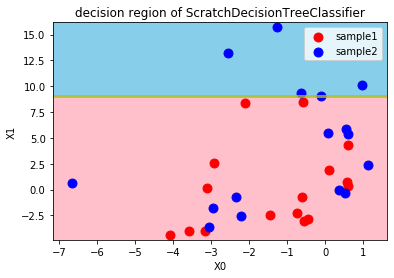

In [32]:
# 可視化
target_names = ['sample1','sample2']
decision_region(X_train, y_train.flatten(), ScratchDT, target_names = target_names, title='decision region of ScratchDecisionTreeClassifier', xlabel='X0', ylabel='X1')

### sklearnと比較

In [33]:
from sklearn.tree import DecisionTreeClassifier

# 決定木
model_DT = DecisionTreeClassifier(criterion ="gini", max_depth = 1, max_leaf_nodes = 2)

# 学習
clf = model_DT.fit(X_train, y_train)

# 推定
y_pred_DT = model_DT.predict(X_test)

# 評価
cr_DT = classification_report(y_test, y_pred_DT, output_dict=True)

# pandas.DataFrameへ変換
df_cr_DT = pd.DataFrame(cr_DT)
display(df_cr_DT)

C:\Users\Takatoshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.500000,0.0,0.5,0.250000,0.250000
recall,1.000000,0.0,0.5,0.500000,0.500000
f1-score,0.666667,0.0,0.5,0.333333,0.333333
support,4.000000,4.0,0.5,8.000000,8.000000


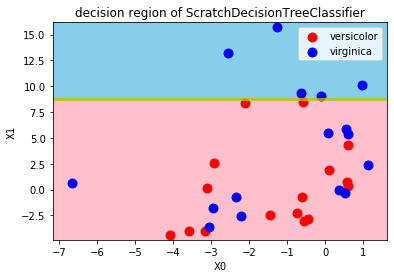

In [34]:
# 可視化
decision_region(X_train, y_train.flatten(), model_DT, title='decision region of ScratchDecisionTreeClassifier', xlabel='X0', ylabel='X1')

In [35]:
from sklearn import tree
estimators = model_DT.max_features_
file_name = "tree_visualization.png"
out_file = "tree_visualization.dot"
dot_data = tree.export_graphviz(model_DT, # 決定木オブジェクトを一つ指定する
                                out_file = None, # ファイルは介さずにGraphvizにdot言語データを渡すのでNone
                                filled=True, # Trueにすると、分岐の際にどちらのノードに多く分類されたのか色で示してくれる
                                rounded=True, # Trueにすると、ノードの角を丸く描画する。
                                feature_names=["class0", "class1"], # これを指定しないとチャート上で特徴量の名前が表示されない
                                class_names= ["class0", "class1"], # これを指定しないとチャート上で分類名が表示されない
                                #special_characters=True # 特殊文字を扱えるようにする
                                )

## 【問題7】（アドバンス課題）深さ2の決定木分類器クラスの作成

深さが2の決定木分類器のクラスScratchDecesionTreeClassifierDepth2を作成してください。


深さ2とは空間の分割を2回行うことを指します。


《ヒント》

各ノードをインスタンスとして扱うと、任意の深さへの拡張が行いやすくなります。

# 以下、未完成です。

In [36]:
class ScratchDecesionTreeClassifierDepth2():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=True):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
        self.threshold = []
        self.feature_index = 0
        self.IGp_index_list = []
        
    '''
    def create_DecesionTree(self, X, y, max_depth = 1):
        IGp, Xy_left, Xy_right, threshold = self.fit(X, y, max_depth)
        
        # 推定
        y_pred = self.predict(X)
    '''
        
        
    def fit(self, X, y, max_depth = 1):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        Xy = np.concatenate([X, y], axis = 1)
        Xy_left = []
        Xy_right = []
        left_list = []
        right_list = []
        
        IGp = np.zeros(X.shape[0] * X.shape[1]).reshape(X.shape[0], X.shape[1])


        # 特徴量の値をループさせ、閾値を設定する
        # k:特徴量Index
        # i:閾値Index
        # j:比較Index
        for k in range(X.shape[1]):
            for i in range(Xy.shape[0]):
                left_list = []
                right_list = []
                for j in range(Xy.shape[0]):
                    if Xy[j,k] < Xy[i,k]:
                        left_list.append(Xy[j])
                    else:
                        right_list.append(Xy[j])


                if len(left_list) == 0 or len(right_list) == 0:
                    print("★★★　k={}, i={}, j={}, ZERO Split  continue".format(k, i, j))            
                    continue


                Xy_left = np.array(left_list).reshape(-1, Xy.shape[1])
                Xy_right = np.array(right_list).reshape(-1, Xy.shape[1])

                left_sample = np.array([ np.count_nonzero(Xy_left[:,-1] == 0, axis=0), np.count_nonzero(Xy_left[:,-1] == 1, axis=0)])
                right_sample = np.array([ np.count_nonzero(Xy_right[:,-1] == 0, axis=0), np.count_nonzero(Xy_right[:,-1] == 1, axis=0)])
                all_sample = np.array([np.count_nonzero(Xy_left[:,-1] == 0, axis=0) +  np.count_nonzero(Xy_right[:,-1] == 0, axis=0), 
                                      np.count_nonzero(Xy_left[:,-1] == 1, axis=0) +  np.count_nonzero(Xy_right[:,-1] == 1, axis=0)])

                IGp[i, k] = self._information_gain(all_sample, left_sample, right_sample)
                
                if self.verbose:
                    #verboseをTrueにした際は学習過程を出力               
                    print("k={}, i={}, j={}, l_sample={}, r_sample={}, a_sample={}, IGp = {}".format(k, i, j, left_sample, right_sample, all_sample, IGp[i, k]))            

        
        # どの特徴量(何列目)か？
        self.feature_index = np.argmax(IGp) % ds_simple2["X"].shape[1]

        # 最終的な閾値は
        #IGp = IGp.flatten()
        self.IGp_index_list.append(np.argmax(IGp))

        test = X.flatten()
        self.threshold = test[np.argmax(IGp)]
        
        if max_depth -1 > 0:
            fit(Xy_left[:,0:X.shape[1]], Xy_left[:,-1], max_depth - 1)
            fit(Xy_right[:,0:X.shape[1]], Xy_right[:,-1], max_depth - 1)
        
        print("★★★self.feature_index = {}, self.threshold = {}".format(self.feature_index, self.threshold))

        return IGp, Xy_left, Xy_right, self.threshold


    
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """

        # 特徴量の値をループさせ、閾値を設定する
        # k:特徴量Index
        # i:閾値Index
        # j:比較Index

        y_pred =np.zeros(X.shape[0]).reshape(-1,1)

        for i in range(X.shape[0]):
            if X[i,self.feature_index] < self.threshold:
                y_pred[i] = 0
                
            else:
                y_pred[i] = 1

        return y_pred

    
    def gini(n):
        '''
        Parameters
        ----------
        n : 次の形のndarray, shape (n_samples, )
            各クラスのサンプル数（class1, class2, ・・・）
        '''

        gini = 1 - np.sum((n / np.sum(n))**2)

        return gini

    
    def _information_gain(self, p_data, left_data, right_data):
        I_left = ( np.sum(left_data)/( np.sum(left_data + right_data)) ) * gini(left_data)
        I_right = ( np.sum(right_data)/( np.sum(left_data + right_data)) ) * gini(right_data)

        IG = gini(p_data) -(I_left + I_right)

        return IG

    def meke_node(self, Xy_left[:,0:Xy_left.shape[1] - 1, max_depth -1 ]):
        pass
        

SyntaxError: invalid syntax (<ipython-input-36-d5d03fed3d1d>, line 144)

In [ ]:
class DecesionTreeManagement():
    def __init__(self, verbose=True):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
        self.threshold = []
        self.feature_index = 0
        self.IGp_index_list = []
        
    def make_node(self, X, y, max_depth = 1):
        node = node()
        
        return node
    
    def fit(self, X, y, max_depth = 1):
        root_node = make_node(X, y, max_depth)
        
        # ノード分割
        root_node.node_sprit(X, y, max_depth)
        
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """

        # 特徴量の値をループさせ、閾値を設定する
        # k:特徴量Index
        # i:閾値Index
        # j:比較Index

        #y_pred =np.zeros(X.shape[0]).reshape(-1,1)

        '''
        for i in range(X.shape[0]):
            if X[i,self.feature_index] < self.threshold:
                y_pred[i] = 0
                
            else:
                y_pred[i] = 1
        '''

        #y_pred = X[X[:,,self.feature_index] < self.threshold ]
        
        
        y_pred = np.where(X[ X[:,self.feature_index] < self.threshold ], 0, 1)
        
        return y_pred

class node():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
# ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
    def __init__(self, verbose=True):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
        self.threshold = []
        self.feature_index = 0
        self.IGp_index_list = []
        
# ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■        
    def node_split(self, X, y, depth):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        
        if depth == 0:
            return
        
        Xy = np.concatenate([X, y], axis = 1)
        Xy_left = []
        Xy_right = []
        left_list = []
        right_list = []
        
        
        IGp = np.zeros(X.shape[0] * X.shape[1]).reshape(X.shape[0], X.shape[1])


        # 特徴量の値をループさせ、閾値を設定する
        # k:特徴量Index
        # i:閾値Index
        for k in range(X.shape[1]):
            for i in range(Xy.shape[0]):
                left_list = []
                right_list = []
                '''
                for j in range(Xy.shape[0]):
                    if Xy[j,k] < Xy[i,k]:
                        left_list.append(Xy[j])
                    else:
                        right_list.append(Xy[j])
                '''
                left_list = Xy[Xy[:,k] < Xy[i,k]]
                left_list = Xy[Xy[:,k] >= Xy[i,k]]        

                if len(left_list) == 0 or len(right_list) == 0:
                    print("★★★　k={}, i={}, j={}, ZERO Split  continue".format(k, i, j))            
                    continue


                # Xy_left = np.array(left_list).reshape(-1, Xy.shape[1])
                # Xy_right = np.array(right_list).reshape(-1, Xy.shape[1])
                
                Xy_left = left_list
                Xy_right = left_list                

                left_sample = np.array([ np.count_nonzero(Xy_left[:,-1] == 0, axis=0), np.count_nonzero(Xy_left[:,-1] == 1, axis=0)])
                right_sample = np.array([ np.count_nonzero(Xy_right[:,-1] == 0, axis=0), np.count_nonzero(Xy_right[:,-1] == 1, axis=0)])
                all_sample = np.array([np.count_nonzero(Xy_left[:,-1] == 0, axis=0) +  np.count_nonzero(Xy_right[:,-1] == 0, axis=0), 
                                      np.count_nonzero(Xy_left[:,-1] == 1, axis=0) +  np.count_nonzero(Xy_right[:,-1] == 1, axis=0)])

                IGp[i, k] = self._information_gain(all_sample, left_sample, right_sample)
                
                if self.verbose:
                    #verboseをTrueにした際は学習過程を出力               
                    print("k={}, i={}, j={}, l_sample={}, r_sample={}, a_sample={}, IGp = {}".format(k, i, j, left_sample, right_sample, all_sample, IGp[i, k]))            

        # 情報利得が０⇒分割終了
        if np.max(IGp) == 0:
            return
        
        
        #self.feature_index = np.argmax(IGp) % ds_simple2["X"].shape[1]
        
        # 何行目の、どの特徴量(何列目)か？
        self.feature_index = np.unravel_index(np.argmax(IGp), Xy.shape)
        print("self.feature_index = []".format(self.feature_index))
        
        # 最終的な閾値は
        #self.IGp_index_list.append(np.argmax(IGp))

        #test = X.flatten()
        self.threshold = X[self.feature_index]
        
        # 左のノード作成
        self.node_left = node()
        self.node_split(Xy_left[:,0:X.shape[1]-1], Xy_left[:,-1], depth - 1)        
        
        #　右ノード作成
        self.node_right = node
        self.node_split(Xy_right[:,0:X.shape[1]-1], Xy_right[:,-1], depth - 1)
        
        print("★★★self.feature_index = {}, self.threshold = {}".format(self.feature_index, self.threshold))

        return
        #return IGp, Xy_left, Xy_right, self.threshold
    
# ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■    
    def predict(self, X, depth):
        """
        決定木分類器を使いラベルを推定する
        """

        # 特徴量の値をループさせ、閾値を設定する
        # k:特徴量Index
        # i:閾値Index
        # j:比較Index

        '''
        y_pred =np.zeros(X.shape[0]).reshape(-1,1)

        for i in range(X.shape[0]):
            if X[i,self.feature_index] < self.threshold:
                y_pred[i] = 0
                
            else:
                y_pred[i] = 1
        '''
        
        y_pred = np.where(X[ X[:,self.feature_index] < self.threshold ], 0, 1)
        
        

        return y_pred
    
# ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
    def gini(n):
        '''
        Parameters
        ----------
        n : 次の形のndarray, shape (n_samples, )
            各クラスのサンプル数（class1, class2, ・・・）
        '''

        gini = 1 - np.sum((n / np.sum(n))**2)

        return gini

# ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
    def _information_gain(self, p_data, left_data, right_data):
        I_left = ( np.sum(left_data)/( np.sum(left_data + right_data)) ) * gini(left_data)
        I_right = ( np.sum(right_data)/( np.sum(left_data + right_data)) ) * gini(right_data)

        IG = gini(p_data) -(I_left + I_right)

        return IG

        

## 【問題8】（アドバンス課題）深さに制限のない決定木分類器クラスの作成

深さに制限のない決定木分類器のクラスScratchDecesionTreeClassifierDepthInfを作成してください。


任意の深さを指定できるようにするとともに、指定しない場合は全ての葉ノードがジニ不純度0となるまで続けられるようにもしてください。